In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

In [26]:
house_data = pd.read_csv("predict_home_value.csv")

In [27]:
#Get overview of data types in the DF
print(f"Size: {len(house_data)}\n{house_data.dtypes}")
house_data.sample(5) #take 5 entries from the dataset

Size: 1460
ID               int64
LOTAREA          int64
BLDGTYPE        object
HOUSESTYLE      object
OVERALLCOND      int64
YEARBUILT        int64
ROOFSTYLE       object
EXTERCOND       object
FOUNDATION      object
BSMTCOND        object
HEATING         object
HEATINGQC       object
CENTRALAIR      object
ELECTRICAL      object
FULLBATH         int64
HALFBATH         int64
BEDROOMABVGR     int64
KITCHENABVGR     int64
KITCHENQUAL     object
TOTRMSABVGRD     int64
FIREPLACES       int64
FIREPLACEQU     object
GARAGETYPE      object
GARAGEFINISH    object
GARAGECARS       int64
GARAGECOND      object
POOLAREA         int64
POOLQC          object
FENCE           object
MOSOLD           int64
YRSOLD           int64
SALEPRICE        int64
dtype: object


,ID,LOTAREA,BLDGTYPE,HOUSESTYLE,OVERALLCOND,YEARBUILT,ROOFSTYLE,EXTERCOND,FOUNDATION,BSMTCOND,...,GARAGETYPE,GARAGEFINISH,GARAGECARS,GARAGECOND,POOLAREA,POOLQC,FENCE,MOSOLD,YRSOLD,SALEPRICE
735,736,10800,1Fam,2.5Unf,7,1914,Gable,TA,BrkTil,TA,...,Detchd,Unf,2,TA,0,NaN,NaN,10,2006,163000
164,165,5400,1Fam,1Story,7,1926,Gable,Gd,BrkTil,TA,...,Detchd,Unf,1,TA,0,NaN,NaN,10,2007,152000
71,72,7599,1Fam,1Story,6,1982,Gable,TA,CBlock,TA,...,Detchd,Unf,2,TA,0,NaN,NaN,6,2007,129500
1297,1298,3675,TwnhsE,SFoyer,5,2005,Gable,TA,PConc,TA,...,Basment,Fin,2,TA,0,NaN,NaN,6,2006,140000
942,943,7711,Duplex,1Story,3,1977,Gable,TA,PConc,TA,...,NaN,NaN,0,NaN,0,NaN,NaN,8,2007,150000


In [28]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            1460 non-null   int64 
 1   LOTAREA       1460 non-null   int64 
 2   BLDGTYPE      1460 non-null   object
 3   HOUSESTYLE    1460 non-null   object
 4   OVERALLCOND   1460 non-null   int64 
 5   YEARBUILT     1460 non-null   int64 
 6   ROOFSTYLE     1460 non-null   object
 7   EXTERCOND     1460 non-null   object
 8   FOUNDATION    1460 non-null   object
 9   BSMTCOND      1423 non-null   object
 10  HEATING       1460 non-null   object
 11  HEATINGQC     1460 non-null   object
 12  CENTRALAIR    1460 non-null   object
 13  ELECTRICAL    1459 non-null   object
 14  FULLBATH      1460 non-null   int64 
 15  HALFBATH      1460 non-null   int64 
 16  BEDROOMABVGR  1460 non-null   int64 
 17  KITCHENABVGR  1460 non-null   int64 
 18  KITCHENQUAL   1460 non-null   object
 19  TOTRMS

In [29]:
#Filter data based on condition
#subset_cols = house_data.columns[~house_data.isna().any()] #All columns with no NA data
#print(subset_cols)
#house_data_clean = house_data.loc[:, subset_cols]
#house_data_clean = house_data_clean.sort_values(by = "YEARBUILT")

In [30]:
#Print data based on condition

subset_cols = house_data.columns
print(subset_cols)
subset_cols = house_data.columns[np.logical_not(house_data.isna().any())]
print(subset_cols)
house_data_clean = house_data.loc[:, subset_cols] #
house_data_clean = house_data_clean.sort_values("YEARBUILT")

Index(['ID', 'LOTAREA', 'BLDGTYPE', 'HOUSESTYLE', 'OVERALLCOND', 'YEARBUILT',
       'ROOFSTYLE', 'EXTERCOND', 'FOUNDATION', 'BSMTCOND', 'HEATING',
       'HEATINGQC', 'CENTRALAIR', 'ELECTRICAL', 'FULLBATH', 'HALFBATH',
       'BEDROOMABVGR', 'KITCHENABVGR', 'KITCHENQUAL', 'TOTRMSABVGRD',
       'FIREPLACES', 'FIREPLACEQU', 'GARAGETYPE', 'GARAGEFINISH', 'GARAGECARS',
       'GARAGECOND', 'POOLAREA', 'POOLQC', 'FENCE', 'MOSOLD', 'YRSOLD',
       'SALEPRICE'],
      dtype='object')
Index(['ID', 'LOTAREA', 'BLDGTYPE', 'HOUSESTYLE', 'OVERALLCOND', 'YEARBUILT',
       'ROOFSTYLE', 'EXTERCOND', 'FOUNDATION', 'HEATING', 'HEATINGQC',
       'CENTRALAIR', 'FULLBATH', 'HALFBATH', 'BEDROOMABVGR', 'KITCHENABVGR',
       'KITCHENQUAL', 'TOTRMSABVGRD', 'FIREPLACES', 'GARAGECARS', 'POOLAREA',
       'MOSOLD', 'YRSOLD', 'SALEPRICE'],
      dtype='object')


In [31]:

house_data_clean['WHENSOLD'] = (house_data_clean['YRSOLD'] + (house_data_clean['MOSOLD']/12))
house_data_clean['ATSALEAGE'] = house_data_clean['WHENSOLD'] - house_data_clean['YEARBUILT']
house_data_clean.sort_values('ATSALEAGE')

,ID,LOTAREA,BLDGTYPE,HOUSESTYLE,OVERALLCOND,YEARBUILT,ROOFSTYLE,EXTERCOND,FOUNDATION,HEATING,...,KITCHENQUAL,TOTRMSABVGRD,FIREPLACES,GARAGECARS,POOLAREA,MOSOLD,YRSOLD,SALEPRICE,WHENSOLD,ATSALEAGE
1298,1299,63887,1Fam,2Story,5,2008,Hip,TA,PConc,GasA,...,Ex,12,3,2,480,1,2008,160000,2008.083333,0.083333
220,221,8990,1Fam,1Story,5,2006,Gable,TA,PConc,GasA,...,Gd,5,0,2,0,4,2006,204900,2006.333333,0.333333
1209,1210,10182,1Fam,1Story,5,2006,Hip,TA,PConc,GasA,...,Gd,8,1,2,0,5,2006,290000,2006.416667,0.416667
281,282,7200,1Fam,1Story,5,2006,Gable,TA,PConc,GasA,...,Gd,5,0,2,0,5,2006,185000,2006.416667,0.416667
492,493,15578,1Fam,2Story,5,2006,Gable,TA,PConc,GasA,...,TA,8,0,2,0,5,2006,172785,2006.416667,0.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,992,17671,1Fam,2Story,9,1882,Gable,Gd,BrkTil,GasA,...,Gd,8,1,2,0,11,2009,168000,2009.916667,127.916667
304,305,18386,1Fam,2.5Fin,9,1880,Gable,TA,BrkTil,GasA,...,Gd,10,1,3,0,5,2008,295000,2008.416667,128.416667
747,748,11700,1Fam,2Story,7,1880,Mansard,TA,Stone,GasW,...,Gd,8,1,4,0,5,2009,265979,2009.416667,129.416667
1137,1138,6342,1Fam,1.5Fin,8,1875,Gable,Gd,CBlock,GasA,...,TA,6,0,0,0,5,2010,94000,2010.416667,135.416667


In [32]:
house_data_clean


,ID,LOTAREA,BLDGTYPE,HOUSESTYLE,OVERALLCOND,YEARBUILT,ROOFSTYLE,EXTERCOND,FOUNDATION,HEATING,...,KITCHENQUAL,TOTRMSABVGRD,FIREPLACES,GARAGECARS,POOLAREA,MOSOLD,YRSOLD,SALEPRICE,WHENSOLD,ATSALEAGE
1349,1350,5250,1Fam,2Story,5,1872,Gable,Gd,BrkTil,OthW,...,TA,8,0,0,0,12,2008,122000,2009.000000,137.000000
1137,1138,6342,1Fam,1.5Fin,8,1875,Gable,Gd,CBlock,GasA,...,TA,6,0,0,0,5,2010,94000,2010.416667,135.416667
1132,1133,9900,1Fam,2Story,4,1880,Gable,TA,BrkTil,GasW,...,Fa,8,0,1,0,5,2007,117500,2007.416667,127.416667
304,305,18386,1Fam,2.5Fin,9,1880,Gable,TA,BrkTil,GasA,...,Gd,10,1,3,0,5,2008,295000,2008.416667,128.416667
747,748,11700,1Fam,2Story,7,1880,Mansard,TA,Stone,GasW,...,Gd,8,1,4,0,5,2009,265979,2009.416667,129.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,104,10402,1Fam,1Story,5,2009,Gable,TA,PConc,GasA,...,Gd,6,0,3,0,5,2010,198900,2010.416667,1.416667
412,413,4403,1Fam,1Story,5,2009,Gable,TA,PConc,GasA,...,Gd,7,1,2,0,6,2010,222000,2010.500000,1.500000
898,899,12919,1Fam,1Story,5,2009,Hip,TA,PConc,GasA,...,Ex,11,2,3,0,3,2010,611657,2010.250000,1.250000
644,645,9187,1Fam,1Story,5,2009,Gable,TA,PConc,GasA,...,Ex,7,1,3,0,10,2009,370878,2009.833333,0.833333


In [33]:
#Get overview of data types in the DF
print(f"Size: {len(house_data_clean)}\n{house_data_clean.dtypes}")

Size: 1460
ID                int64
LOTAREA           int64
BLDGTYPE         object
HOUSESTYLE       object
OVERALLCOND       int64
YEARBUILT         int64
ROOFSTYLE        object
EXTERCOND        object
FOUNDATION       object
HEATING          object
HEATINGQC        object
CENTRALAIR       object
FULLBATH          int64
HALFBATH          int64
BEDROOMABVGR      int64
KITCHENABVGR      int64
KITCHENQUAL      object
TOTRMSABVGRD      int64
FIREPLACES        int64
GARAGECARS        int64
POOLAREA          int64
MOSOLD            int64
YRSOLD            int64
SALEPRICE         int64
WHENSOLD        float64
ATSALEAGE       float64
dtype: object


In [34]:
house_data_clean.info()
house_data_clean.isna().any()
house_data_clean.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1349 to 378
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1460 non-null   int64  
 1   LOTAREA       1460 non-null   int64  
 2   BLDGTYPE      1460 non-null   object 
 3   HOUSESTYLE    1460 non-null   object 
 4   OVERALLCOND   1460 non-null   int64  
 5   YEARBUILT     1460 non-null   int64  
 6   ROOFSTYLE     1460 non-null   object 
 7   EXTERCOND     1460 non-null   object 
 8   FOUNDATION    1460 non-null   object 
 9   HEATING       1460 non-null   object 
 10  HEATINGQC     1460 non-null   object 
 11  CENTRALAIR    1460 non-null   object 
 12  FULLBATH      1460 non-null   int64  
 13  HALFBATH      1460 non-null   int64  
 14  BEDROOMABVGR  1460 non-null   int64  
 15  KITCHENABVGR  1460 non-null   int64  
 16  KITCHENQUAL   1460 non-null   object 
 17  TOTRMSABVGRD  1460 non-null   int64  
 18  FIREPLACES    1460 non-null   i

ID              0
LOTAREA         0
BLDGTYPE        0
HOUSESTYLE      0
OVERALLCOND     0
YEARBUILT       0
ROOFSTYLE       0
EXTERCOND       0
FOUNDATION      0
HEATING         0
HEATINGQC       0
CENTRALAIR      0
FULLBATH        0
HALFBATH        0
BEDROOMABVGR    0
KITCHENABVGR    0
KITCHENQUAL     0
TOTRMSABVGRD    0
FIREPLACES      0
GARAGECARS      0
POOLAREA        0
MOSOLD          0
YRSOLD          0
SALEPRICE       0
WHENSOLD        0
ATSALEAGE       0
dtype: int64

In [35]:
selected_columns = [
    'ATSALEAGE', 'SALEPRICE', 'LOTAREA', 'OVERALLCOND', 
    'YEARBUILT', 'TOTRMSABVGRD', 'KITCHENABVGR', 'FIREPLACES', 'GARAGECARS'
]
df = house_data_clean[selected_columns]
X = df.drop('SALEPRICE', axis=1)
y = df['SALEPRICE']

In [36]:
df

,ATSALEAGE,SALEPRICE,LOTAREA,OVERALLCOND,YEARBUILT,TOTRMSABVGRD,KITCHENABVGR,FIREPLACES,GARAGECARS
1349,137.000000,122000,5250,5,1872,8,1,0,0
1137,135.416667,94000,6342,8,1875,6,1,0,0
1132,127.416667,117500,9900,4,1880,8,1,0,1
304,128.416667,295000,18386,9,1880,10,1,1,3
747,129.416667,265979,11700,7,1880,8,1,1,4
...,...,...,...,...,...,...,...,...,...
103,1.416667,198900,10402,5,2009,6,1,0,3
412,1.500000,222000,4403,5,2009,7,1,1,2
898,1.250000,611657,12919,5,2009,11,1,2,3
644,0.833333,370878,9187,5,2009,7,1,1,3


C:\Users\llvil\AppData\Local\Temp\ipykernel_26540\2231583934.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[lab, 'ROOMS'] = 'few'


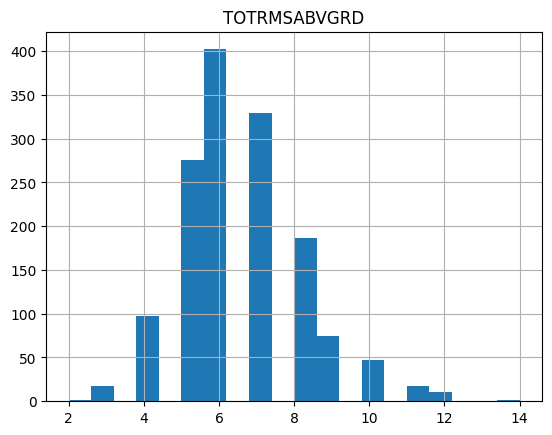

In [37]:
#df.plot(y = 'SALEPRICE', x = 'LOTAREA', kind = 'scatter')
#df.hist('LOTAREA', bins = 50)
df.hist('TOTRMSABVGRD', bins = 20)
many_rooms = df[df['TOTRMSABVGRD'] > 6]
few_rooms = df[df['TOTRMSABVGRD'] <= 6] 
#if df[['TOTRMSABVGRD']] > 6 :
#    df['many_rooms'] = 'Yes'
#else:
#    df['many_rooms'] = 'No'


for lab, row in df.iterrows():
    if row['TOTRMSABVGRD'] > 8:
        df.loc[lab, 'ROOMS'] = 'many'
    elif row['TOTRMSABVGRD'] >= 6 and row['TOTRMSABVGRD'] <8:
        df.loc[lab, 'ROOMS'] = 'mid'
    else:
        df.loc[lab, 'ROOMS'] = 'few'



In [38]:
df.groupby(['TOTRMSABVGRD', 'ROOMS']).value_counts()

TOTRMSABVGRD  ROOMS  ATSALEAGE   SALEPRICE  LOTAREA  OVERALLCOND  YEARBUILT  KITCHENABVGR  FIREPLACES  GARAGECARS
2             few    61.083333   39300      5000     3            1946       1             0           0             1
3             few    2.416667    155900     4435     5            2004       1             1           2             1
                     4.083333    149000     4438     5            2004       1             1           2             1
                     4.416667    141000     4426     5            2004       1             1           2             1
                                 149300     4426     5            2004       1             1           2             1
                                                                                                                    ..
12            many   50.083333   154300     11600    5            1960       2             0           2             1
                     61.250000   200500     18030    

In [39]:
df

,ATSALEAGE,SALEPRICE,LOTAREA,OVERALLCOND,YEARBUILT,TOTRMSABVGRD,KITCHENABVGR,FIREPLACES,GARAGECARS,ROOMS
1349,137.000000,122000,5250,5,1872,8,1,0,0,few
1137,135.416667,94000,6342,8,1875,6,1,0,0,mid
1132,127.416667,117500,9900,4,1880,8,1,0,1,few
304,128.416667,295000,18386,9,1880,10,1,1,3,many
747,129.416667,265979,11700,7,1880,8,1,1,4,few
...,...,...,...,...,...,...,...,...,...,...
103,1.416667,198900,10402,5,2009,6,1,0,3,mid
412,1.500000,222000,4403,5,2009,7,1,1,2,mid
898,1.250000,611657,12919,5,2009,11,1,2,3,many
644,0.833333,370878,9187,5,2009,7,1,1,3,mid


In [40]:
df

dict = {'many': 'red', 'mid': 'green', 'few': 'blue'}


df['Color'] = df['ROOMS'].map(dict)

C:\Users\llvil\AppData\Local\Temp\ipykernel_26540\1956765281.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Color'] = df['ROOMS'].map(dict)


In [41]:
df

,ATSALEAGE,SALEPRICE,LOTAREA,OVERALLCOND,YEARBUILT,TOTRMSABVGRD,KITCHENABVGR,FIREPLACES,GARAGECARS,ROOMS,Color
1349,137.000000,122000,5250,5,1872,8,1,0,0,few,blue
1137,135.416667,94000,6342,8,1875,6,1,0,0,mid,green
1132,127.416667,117500,9900,4,1880,8,1,0,1,few,blue
304,128.416667,295000,18386,9,1880,10,1,1,3,many,red
747,129.416667,265979,11700,7,1880,8,1,1,4,few,blue
...,...,...,...,...,...,...,...,...,...,...,...
103,1.416667,198900,10402,5,2009,6,1,0,3,mid,green
412,1.500000,222000,4403,5,2009,7,1,1,2,mid,green
898,1.250000,611657,12919,5,2009,11,1,2,3,many,red
644,0.833333,370878,9187,5,2009,7,1,1,3,mid,green


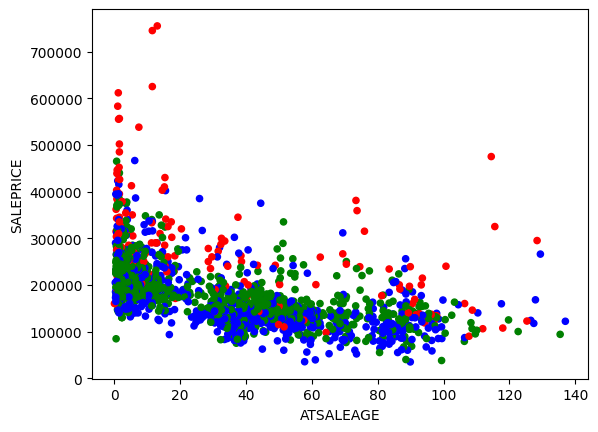

In [42]:


df.plot(y = 'SALEPRICE', x = 'ATSALEAGE', kind = 'scatter', c = df['Color'])
plt.show()

In [43]:
from sklearn.linear_model import HuberRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor


models = {
    "Huber Regressor": HuberRegressor(),
    "Kernel Ridge": KernelRidge(),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(50,), max_iter=100000, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42)
}

In [44]:
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features where necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluate models
print(f"{'Model':<20} {'Train R²':>10} {'Test R²':>10}")
print("=" * 42)

for name, model in models.items():
    if name in ["Huber Regressor", "Kernel Ridge", "MLP Regressor"]:
        model.fit(X_train_scaled, y_train)
        r2_train = r2_score(y_train, model.predict(X_train_scaled))
        r2_test = r2_score(y_test, model.predict(X_test_scaled))
    else:
        model.fit(X_train, y_train)
        r2_train = r2_score(y_train, model.predict(X_train))
        r2_test = r2_score(y_test, model.predict(X_test))

    print(f"{name:<20} {r2_train:>10.3f} {r2_test:>10.3f}")

Model                  Train R²    Test R²
Huber Regressor           0.646      0.633
Kernel Ridge             -4.373     -5.883
MLP Regressor             0.747      0.724
Random Forest             0.963      0.717
AdaBoost                  0.703      0.562


In [45]:
df.count()


ATSALEAGE       1460
SALEPRICE       1460
LOTAREA         1460
OVERALLCOND     1460
YEARBUILT       1460
TOTRMSABVGRD    1460
KITCHENABVGR    1460
FIREPLACES      1460
GARAGECARS      1460
ROOMS           1460
Color           1460
dtype: int64

In [46]:
df

,ATSALEAGE,SALEPRICE,LOTAREA,OVERALLCOND,YEARBUILT,TOTRMSABVGRD,KITCHENABVGR,FIREPLACES,GARAGECARS,ROOMS,Color
1349,137.000000,122000,5250,5,1872,8,1,0,0,few,blue
1137,135.416667,94000,6342,8,1875,6,1,0,0,mid,green
1132,127.416667,117500,9900,4,1880,8,1,0,1,few,blue
304,128.416667,295000,18386,9,1880,10,1,1,3,many,red
747,129.416667,265979,11700,7,1880,8,1,1,4,few,blue
...,...,...,...,...,...,...,...,...,...,...,...
103,1.416667,198900,10402,5,2009,6,1,0,3,mid,green
412,1.500000,222000,4403,5,2009,7,1,1,2,mid,green
898,1.250000,611657,12919,5,2009,11,1,2,3,many,red
644,0.833333,370878,9187,5,2009,7,1,1,3,mid,green


In [47]:
importances = model.feature_importances_       # array of importance scores
feature_names = X.columns

# Convert to pandas Series for easy plotting
feat_importance = pd.Series(importances, index=feature_names)
feat_importance = feat_importance.sort_values(ascending=False)

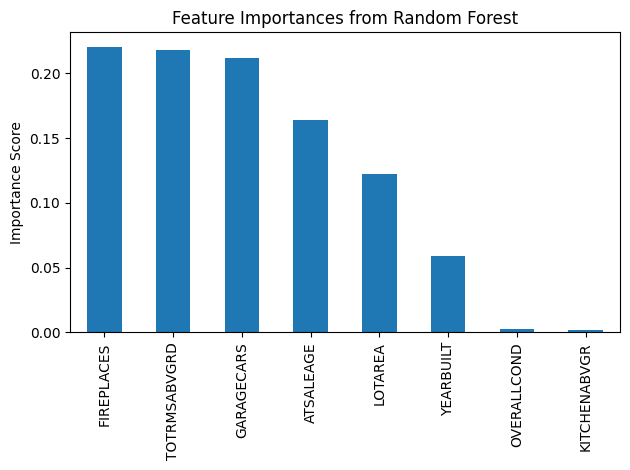

In [48]:
feat_importance.plot(kind='bar', title='Feature Importances from Random Forest')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()